In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [3]:
sodh = pd.read_csv('full_dataset_saved.csv')

In [4]:
# for c in sodh.columns:
#     print(c)

In [5]:
census_tract_features = ['ACCESS2_16', 'BINGE_16', 'LPA_16', 'MHLTH_16', 'PHLTH_16', 'PTGNRL_12', 'PTPRIM_12', 'BACH_00', 'BACH_10', 'CLINIC_18', 'MEDHV_00', 'MEDHV_10', 'HMINC_12', 'HMINC_13', 'HMINC_14', 'HMINC_15', 'HMINC_16', 'HMINC_17', 'census_tract']

In [6]:
census_tract_features_data = sodh[census_tract_features]

# Correlation between Sodh features and Public School enrollment

In [7]:
def correlation_plots(census_file_name, census_tract_features_data):
    census_data = pd.read_csv(census_file_name)
    new_header = census_data.iloc[0]
    census_data.columns = new_header
    census_data.drop(index=0, inplace=True)
    cols_margin_error = [c for c in census_data.columns if c[0:15] == 'Margin of Error']
    census_data.drop(columns=cols_margin_error, inplace=True)
    census_data = census_data.iloc[:, [0, 2, 9, 12, 33, 36]]
    census_data['census_tract'] = census_data['id'].str[9:]
    census_data.drop(columns='id', inplace=True)
    census_data.drop(index=61, inplace=True)

    census_data['public_elem_total'] = pd.to_numeric(census_data.iloc[:, 1]) + pd.to_numeric(census_data.iloc[:, 2]) + pd.to_numeric(census_data.iloc[:, 3]) + pd.to_numeric(census_data.iloc[:, 4])

    seg_cols_to_drop = ["Estimate!!Total!!Male!!Enrolled in school!!Enrolled in kindergarten!!Public school", "Estimate!!Total!!Male!!Enrolled in school!!Enrolled in grade 1 to grade 4!!Public school", "Estimate!!Total!!Female!!Enrolled in school!!Enrolled in kindergarten!!Public school", "Estimate!!Total!!Female!!Enrolled in school!!Enrolled in grade 1 to grade 4!!Public school"]
    census_data.drop(columns=seg_cols_to_drop, inplace=True)
    census_data.rename(columns={"Estimate!!Total": "total_population"}, inplace=True)
    census_tract_features_data['census_tract'] = census_tract_features_data['census_tract'].astype(str)


    census_tract_analysis = census_data.merge(census_tract_features_data, on='census_tract')
    census_tract_analysis = census_tract_analysis.dropna()
    census_tract_analysis['total_population'] = census_tract_analysis['total_population'].astype(int)
    census_tract_analysis['public_elem_percentage'] = census_tract_analysis['public_elem_total']/census_tract_analysis['total_population'] * 100
    census_tract_analysis.drop(columns=['public_elem_total', 'total_population'], inplace=True)
    sns.heatmap(census_tract_analysis.corr(), annot=True)

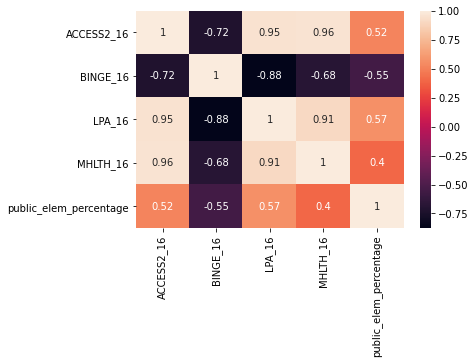

In [8]:
census_tract_features_data16 = census_tract_features_data[['ACCESS2_16', 'BINGE_16', 'LPA_16', 'MHLTH_16', 'census_tract']]
census_tract_features_data16.drop_duplicates(inplace=True)
correlation_plots('Census Data on Public School - Census Tract - 2010 to 2019/ACSDT5Y2016.B14002_data_with_overlays_2021-02-10T142222.csv', census_tract_features_data16)

In [9]:
census_tract_features_data15 = census_tract_features_data[['PTGNRL_12', 'PTPRIM_12', 'census_tract']]
census_tract_features_data15.drop_duplicates(inplace=True)

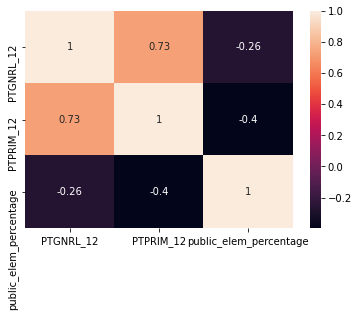

In [10]:
correlation_plots('Census Data on Public School - Census Tract - 2010 to 2019/ACSDT5Y2015.B14002_data_with_overlays_2021-02-10T142222.csv', census_tract_features_data15)

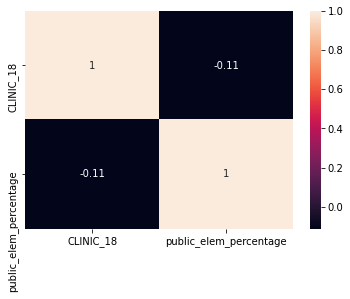

In [11]:
census_tract_features_data18 = census_tract_features_data[['CLINIC_18', 'census_tract']]
census_tract_features_data18.drop_duplicates(inplace=True)
correlation_plots('Census Data on Public School - Census Tract - 2010 to 2019/ACSDT5Y2018.B14002_data_with_overlays_2021-02-10T142222.csv', census_tract_features_data18)

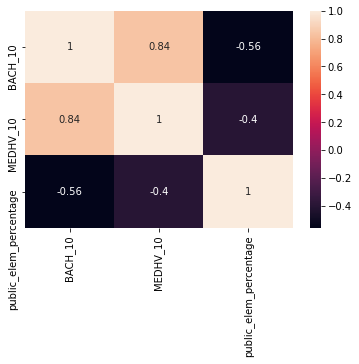

In [12]:
census_tract_features_data10 = census_tract_features_data[['BACH_10', 'MEDHV_10', 'census_tract']]
census_tract_features_data10.drop_duplicates(inplace=True)
plt.xticks(rotation = 90)
correlation_plots('Census Data on Public School - Census Tract - 2010 to 2019/ACSDT5Y2010.B14002_data_with_overlays_2021-02-10T142222.csv', census_tract_features_data10)

# Correlation between Bechelor's degree and higher holder with Public School attendence

In [13]:
import glob

In [14]:
    census_data = pd.read_csv('Census Data on Public School - Census Tract - 2010 to 2019/ACSDT5Y2010.B14002_data_with_overlays_2021-02-10T142222.csv')
    new_header = census_data.iloc[0]
    census_data.columns = new_header
    census_data.drop(index=0, inplace=True)
    cols_margin_error = [c for c in census_data.columns if c[0:15] == 'Margin of Error']
    census_data.drop(columns=cols_margin_error, inplace=True)
    census_data = census_data.iloc[:, [0, 2, 9, 12, 33, 36]]
    census_data['census_tract'] = census_data['id'].str[9:]
    census_data.drop(columns='id', inplace=True)
    census_data.drop(index=61, inplace=True)

    census_data['public_elem_total'] = pd.to_numeric(census_data.iloc[:, 1]) + pd.to_numeric(census_data.iloc[:, 2]) + pd.to_numeric(census_data.iloc[:, 3]) + pd.to_numeric(census_data.iloc[:, 4])

    seg_cols_to_drop = ["Estimate!!Total!!Male!!Enrolled in school!!Enrolled in kindergarten!!Public school", "Estimate!!Total!!Male!!Enrolled in school!!Enrolled in grade 1 to grade 4!!Public school", "Estimate!!Total!!Female!!Enrolled in school!!Enrolled in kindergarten!!Public school", "Estimate!!Total!!Female!!Enrolled in school!!Enrolled in grade 1 to grade 4!!Public school"]
    census_data.drop(columns=seg_cols_to_drop, inplace=True)
    census_data.rename(columns={"Estimate!!Total": "total_population"}, inplace=True)

In [15]:
def clean_bach_files(bach_files):
    census_data_bach = pd.read_csv(bach_files)
    new_header = census_data_bach.iloc[0]
    census_data_bach.columns = new_header
    census_data_bach.drop(index=0, inplace=True)
    cols_margin_error = [c for c in census_data_bach.columns if 'Margin of Error' in c]
    census_data_bach.drop(columns=cols_margin_error, inplace=True)
    cols_bach = [c for c in census_data_bach.columns if "Bachelor's degree or higher" in c]
    cols_bach.insert(0, 'census_tract')
    census_data_bach['census_tract'] = census_data_bach['id'].str[9:]
    census_data_bach.drop(columns='id', inplace=True)
    census_data_bach = census_data_bach[cols_bach]
    year = bach_files[62:66]

    if (year == '2010') or (year == '2011') or (year == '2012'):
        census_data_bach = pd.read_csv(bach_files)
        new_header = census_data_bach.iloc[0]
        census_data_bach.columns = new_header
        census_data_bach.drop(index=0, inplace=True) 
        cols_margin_error = [c for c in census_data_bach.columns if 'Margin of Error' in c]
        census_data_bach.drop(columns=cols_margin_error, inplace=True)
        census_data_bach.columns = pd.io.parsers.ParserBase({'names':census_data_bach.columns})._maybe_dedup_names(census_data_bach.columns)
        cols_pop_bach = [c for c in census_data_bach.columns if ("Total!!Estimate!!Population" in c) or ("Total!!Estimate!!Bachelor's degree or higher" in c)]
        cols_pop_bach.insert(0, 'census_tract')
        census_data_bach['census_tract'] = census_data_bach['id'].str[9:]
        census_data_bach.drop(columns='id', inplace=True)
        census_data_bach = census_data_bach[cols_pop_bach]
        census_data_bach = census_data_bach.replace("-", 0)
        census_data_bach.iloc[:, 1:] = census_data_bach.iloc[:, 1:].apply(pd.to_numeric)
        census_data_bach['pop_bach_18_24'] = census_data_bach["Total!!Estimate!!Population 18 to 24 years"] * census_data_bach["Total!!Estimate!!Bachelor's degree or higher"]/100
        census_data_bach['pop_bach_25_34'] = census_data_bach["Total!!Estimate!!Population 25 to 34 years"] * census_data_bach["Total!!Estimate!!Bachelor's degree or higher.1"]/100
        census_data_bach['pop_bach_35_44'] = census_data_bach["Total!!Estimate!!Population 35 to 44 years"] * census_data_bach["Total!!Estimate!!Bachelor's degree or higher.2"]/100
        census_data_bach['pop_bach_45_64'] = census_data_bach["Total!!Estimate!!Population 45 to 64 years"] * census_data_bach["Total!!Estimate!!Bachelor's degree or higher.3"]/100
        census_data_bach['pop_bach_65'] = census_data_bach["Total!!Estimate!!Population 65 years and over"] * census_data_bach["Total!!Estimate!!Bachelor's degree or higher.4"]/100
        cols_to_keep = ['census_tract', 'pop_bach_18_24', 'pop_bach_25_34', 'pop_bach_35_44', 'pop_bach_45_64', 'pop_bach_65']
        census_data_bach = census_data_bach[cols_to_keep]
        census_data_bach['total_bach'] = round(census_data_bach.iloc[:, 1:].sum(axis=1))
        cols_to_keep = ['census_tract', 'total_bach']
        census_data_bach = census_data_bach[cols_to_keep]
    elif (year == '2013') or (year == '2014'):
        census_data_bach = pd.read_csv(bach_files)
        new_header = census_data_bach.iloc[0]
        census_data_bach.columns = new_header
        census_data_bach.drop(index=0, inplace=True) 
        cols_margin_error = [c for c in census_data_bach.columns if 'Margin of Error' in c]
        census_data_bach.drop(columns=cols_margin_error, inplace=True)
        cols_pop_bach = [c for c in census_data_bach.columns if ("Total!!Estimate!!Population" in c) or ("Total!!Estimate!!Bachelor's degree or higher" in c)]
        cols_pop_bach.insert(0, 'census_tract')
        census_data_bach['census_tract'] = census_data_bach['id'].str[9:]
        census_data_bach.drop(columns='id', inplace=True)
        census_data_bach = census_data_bach[cols_pop_bach]
        census_data_bach = census_data_bach.replace("-", 0)
        census_data_bach.iloc[:, 1:] = census_data_bach.iloc[:, 1:].apply(pd.to_numeric)
        census_data_bach['pop_bach_18_24'] = census_data_bach["Total!!Estimate!!Population 18 to 24 years"]*census_data_bach["Total!!Estimate!!Bachelor's degree or higher"]/100
        census_data_bach['pop_bach_25_34'] = census_data_bach["Total!!Estimate!!Population 25 to 34 years"]*census_data_bach["Total!!Estimate!!Population 25 to 34 years!!Bachelor's degree or higher"]/100
        census_data_bach['pop_bach_35_44'] = census_data_bach["Total!!Estimate!!Population 35 to 44 years"]*census_data_bach["Total!!Estimate!!Population 35 to 44 years!!Bachelor's degree or higher"]/100
        census_data_bach['pop_bach_45_64'] = census_data_bach["Total!!Estimate!!Population 45 to 64 years"]*census_data_bach["Total!!Estimate!!Population 45 to 64 years!!Bachelor's degree or higher"]/100
        census_data_bach['pop_bach_65'] = census_data_bach["Total!!Estimate!!Population 65 years and over"]*census_data_bach["Total!!Estimate!!Population 65 years and over!!Bachelor's degree or higher"]/100
        cols_to_keep = ['census_tract', 'pop_bach_18_24', 'pop_bach_25_34', 'pop_bach_35_44', 'pop_bach_45_64', 'pop_bach_65']
        census_data_bach = census_data_bach[cols_to_keep]
        census_data_bach = census_data_bach[cols_to_keep]
        census_data_bach['total_bach'] = round(census_data_bach.iloc[:, 1:].sum(axis=1))
        cols_to_keep = ['census_tract', 'total_bach']
        census_data_bach = census_data_bach[cols_to_keep]
    elif (year == '2015') or (year == '2016'):
        census_data_bach = census_data_bach.iloc[:, 0:6]
        census_data_bach.iloc[:, 1:6] = census_data_bach.iloc[:, 1:6].apply(pd.to_numeric, errors='coerce')
        census_data_bach['total_bach'] = census_data_bach.iloc[:, 1:6].sum(axis=1)
        census_data_bach = census_data_bach[['census_tract', 'total_bach']]
    elif (year == '2017') or (year == '2018'):
        cols_total = [c for c in census_data_bach.columns if "Estimate!!Total!!Population" in c]
        cols_total.insert(0, 'census_tract')
        census_data_bach = census_data_bach[cols_total]    
        census_data_bach.iloc[:, 1:6] = census_data_bach.iloc[:, 1:6].apply(pd.to_numeric, errors='coerce')
        census_data_bach['total_bach'] = census_data_bach.iloc[:, 1:6].sum(axis=1)
        census_data_bach = census_data_bach[['census_tract', 'total_bach']]
    else:
        cols_total = [c for c in census_data_bach.columns if "Estimate!!Total!!" in c]
        cols_total.insert(0, 'census_tract')
        census_data_bach = census_data_bach[cols_total]
        census_data_bach.iloc[:, 1:6] = census_data_bach.iloc[:, 1:6].apply(pd.to_numeric, errors='coerce')
        census_data_bach['total_bach'] = census_data_bach.iloc[:, 1:6].sum(axis=1)
        census_data_bach = census_data_bach[['census_tract', 'total_bach']]

    census_data_bach.drop(index=61, inplace=True)

    return census_data_bach

In [16]:
#clean_bach_files('Census Data on Education - Census Tract - 2010 to 2019/ACSST5Y2019.S1501_data_with_overlays_2021-02-10T143503.csv')

In [17]:
def clean_elem_files(elem_files):
    census_data = pd.read_csv(elem_files)
    new_header = census_data.iloc[0]
    census_data.columns = new_header
    census_data.drop(index=0, inplace=True)
    cols_margin_error = [c for c in census_data.columns if c[0:15] == 'Margin of Error']
    census_data.drop(columns=cols_margin_error, inplace=True)
    census_data = census_data.iloc[:, [0, 2, 9, 12, 33, 36]]
    census_data['census_tract'] = census_data['id'].str[9:]
    census_data.drop(columns='id', inplace=True)
    census_data.drop(index=61, inplace=True)
    census_data['public_elem_total'] = pd.to_numeric(census_data.iloc[:, 1]) + pd.to_numeric(census_data.iloc[:, 2]) + pd.to_numeric(census_data.iloc[:, 3]) + pd.to_numeric(census_data.iloc[:, 4])

    year = elem_files[66:70]
    if (year == '2019'):
        seg_cols_to_drop = ["Estimate!!Total:!!Male:!!Enrolled in school:!!Enrolled in kindergarten:!!Public school", "Estimate!!Total:!!Male:!!Enrolled in school:!!Enrolled in grade 1 to grade 4:!!Public school", "Estimate!!Total:!!Female:!!Enrolled in school:!!Enrolled in kindergarten:!!Public school", "Estimate!!Total:!!Female:!!Enrolled in school:!!Enrolled in grade 1 to grade 4:!!Public school"]
        census_data.drop(columns=seg_cols_to_drop, inplace=True)
        census_data.rename(columns={"Estimate!!Total:": "total_population"}, inplace=True)
    else:
        seg_cols_to_drop = ["Estimate!!Total!!Male!!Enrolled in school!!Enrolled in kindergarten!!Public school", "Estimate!!Total!!Male!!Enrolled in school!!Enrolled in grade 1 to grade 4!!Public school", "Estimate!!Total!!Female!!Enrolled in school!!Enrolled in kindergarten!!Public school", "Estimate!!Total!!Female!!Enrolled in school!!Enrolled in grade 1 to grade 4!!Public school"]
        census_data.drop(columns=seg_cols_to_drop, inplace=True)
        census_data.rename(columns={"Estimate!!Total": "total_population"}, inplace=True)

    census_data['public_elem_percentage'] = (census_data['public_elem_total']/census_data['total_population'].astype(int))*100

    return census_data

In [20]:
public_elem2019 = clean_elem_files('Census Data on Public School - Census Tract - 2010 to 2019/ACSDT5Y2019.B14002_data_with_overlays_2021-02-10T142222.csv')

In [21]:
public_elem2019.columns

Index(['total_population', 'census_tract', 'public_elem_total',
       'public_elem_percentage'],
      dtype='object', name=0)

In [24]:
population_5to9 = public_elem2019[['census_tract', 'total_population']]

In [26]:
population_5to9_enrollments = public_elem2019[['census_tract', 'public_elem_total']]

In [27]:
pwd

'/Users/anshupriyasrivastava/Desktop/school-choice/SoDH'

In [34]:
population_5to9.to_csv('population_5to9.csv', index=False)

In [35]:
population_5to9_enrollments.to_csv('population_5to9_enrollments.csv', index=False)

In [19]:
bach_elem_corr = {}

bach_files = glob.glob('Census Data on Education - Census Tract - 2010 to 2019/*.csv')
elem_files = glob.glob('Census Data on Public School - Census Tract - 2010 to 2019/*.csv')

for bf, ef in zip(bach_files, elem_files):
    bach_file = clean_bach_files(bf)
    elem_file = clean_elem_files(ef)
    census_bach_elem_analysis = bach_file.merge(elem_file, on='census_tract')
    year = bf[62:66]
    census_bach_elem_analysis['bach_percentage'] = census_bach_elem_analysis['total_bach']/census_bach_elem_analysis['total_population'].astype(int)*100
    correlations = census_bach_elem_analysis[['public_elem_percentage', 'bach_percentage']].corr()
    bach_elem_corr[year] = correlations.iloc[0, 1]
    
print(bach_elem_corr)

{'2014': -0.48853040666569014, '2019': -0.3957460018044509, '2011': -0.38236449280326357, '2013': -0.47134088295335447, '2016': -0.37985035750817353, '2017': -0.37636282053376086, '2012': -0.37729189086999615, '2010': -0.42037214426101094, '2018': -0.3676701938347611, '2015': -0.3491485531233987}


In [20]:
import collections

ordered_bach_elem_corr = collections.OrderedDict(sorted(bach_elem_corr.items()))

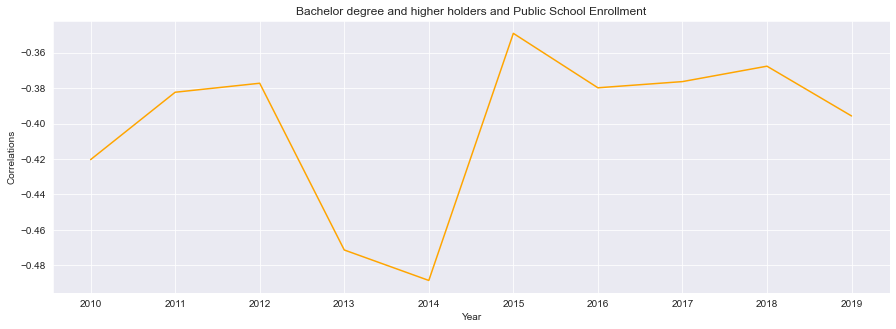

In [21]:
plt.figure(figsize=(15,5))
sns.set_style("darkgrid")
sns.lineplot(x=ordered_bach_elem_corr.keys(), y=ordered_bach_elem_corr.values(), color='orange')
plt.title('Bachelor degree and higher holders and Public School Enrollment')
plt.xlabel('Year')
plt.ylabel('Correlations')
plt.show()

# Median homebuyer's income 2012 - 2017

In [22]:
med_home_buyer = sodh[['HMINC_12', 'HMINC_13', 'HMINC_14', 'HMINC_15', 'HMINC_16', 'HMINC_17', 'census_tract']]

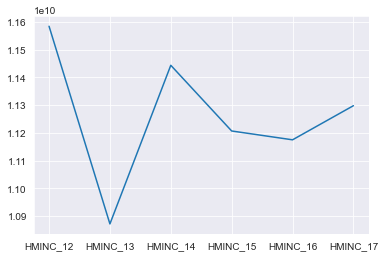

In [23]:
med_home_buyer[['HMINC_12', 'HMINC_13', 'HMINC_14', 'HMINC_15', 'HMINC_16', 'HMINC_17']].sum(axis=0).round(2).plot();

In [24]:
med_home_buyer['census_tract'] = med_home_buyer['census_tract'].astype(str)

In [25]:
elem_files = glob.glob('Census Data on Public School - Census Tract - 2010 to 2019/*.csv')
corr_medhb = {}
i = 0

for ef in elem_files:
    year = ef[66:70]
    if year == '2010' or year == '2011' or year == '2018' or year == '2019':
        exit
    else:
        elem = clean_elem_files(ef)
        year_hminc = year[2:]
        hminc_col = 'HMINC_' + year_hminc
        medhv_df = med_home_buyer[[hminc_col, 'census_tract']]
        medhv_elem_analysis = medhv_df.merge(elem, on='census_tract')
        medhv_elem_analysis = medhv_elem_analysis.dropna()
        corrs_medhv = medhv_elem_analysis.corr()
        #corr_medhb['year'] = corrs_medhv.iloc[1, 0]
        corrs = corrs_medhv.iloc[1, 0]
        corr_medhb[year] = corrs
        i += 1

In [26]:
ordered_medhm_elem_corr = collections.OrderedDict(sorted(corr_medhb.items()))

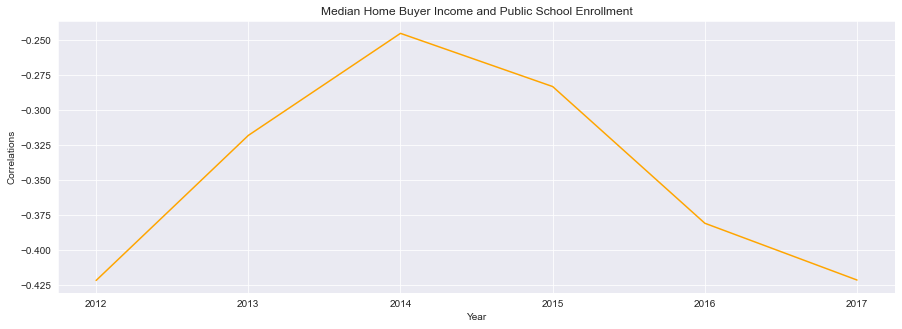

In [27]:
plt.figure(figsize=(15,5))
sns.set_style("darkgrid")
sns.lineplot(x=ordered_medhm_elem_corr.keys(), y=ordered_medhm_elem_corr.values(), color='orange')
plt.title('Median Home Buyer Income and Public School Enrollment')
plt.xlabel('Year')
plt.ylabel('Correlations')
plt.show()

# Blockgroup Data

In [208]:
elem_school_bg = pd.read_csv('Census Data on Public School - BlockGroup - 2010 to 2019/ACSDT5Y2013.B14002_data_with_overlays_2021-02-23T085219.csv')

In [209]:
new_header = elem_school_bg.iloc[0]
elem_school_bg.columns = new_header
elem_school_bg.drop(index=0, inplace=True)
cols_margin_error = [c for c in elem_school_bg.columns if c[0:15] == 'Margin of Error']
elem_school_bg.drop(columns=cols_margin_error, inplace=True)

In [210]:
cols_public_schools = [c for c in elem_school_bg.columns if 'Public' in c]
cols_public_schools.insert(0, 'Geographic Area Name')
cols_public_schools.insert(0, 'id')
elem_school_bg = elem_school_bg[cols_public_schools]

In [211]:
cols_grades = [c for c in elem_school_bg.columns if 'kindergarten' in c or 'grade 1 to grade 4' in c]
cols_grades.insert(0, 'Geographic Area Name')
cols_grades.insert(0, 'id')
elem_school_bg = elem_school_bg[cols_grades]

In [212]:
elem_school_bg['public_elem_total'] = pd.to_numeric(elem_school_bg.iloc[:, 2]) + pd.to_numeric(elem_school_bg.iloc[:, 3]) + pd.to_numeric(elem_school_bg.iloc[:, 4]) + pd.to_numeric(elem_school_bg.iloc[:, 5])
cols_grades = [c for c in elem_school_bg.columns if 'kindergarten' in c or 'grade 1 to grade 4' in c]
elem_school_bg.drop(columns=cols_grades, inplace=True)

In [213]:
elem_school_bg['id']

1      1500000US370630001011
2      1500000US370630001012
3      1500000US370630001021
4      1500000US370630001022
5      1500000US370630002001
               ...          
150    1500000US370630022001
151    1500000US370630023001
152    1500000US370630023002
153    1500000US370639801001
154                0100000US
Name: id, Length: 154, dtype: object

In [214]:
elem_school_bg['id'].str[9:]

1      370630001011
2      370630001012
3      370630001021
4      370630001022
5      370630002001
           ...     
150    370630022001
151    370630023001
152    370630023002
153    370639801001
154                
Name: id, Length: 154, dtype: object

In [218]:
sodh['blockgroup']

0         37063002009100
1         37063002100301
2         37063002100302
3         37063002100302
4         37063002100302
               ...      
141227    37063001706201
141228    37063001706201
141229    37063001706201
141230    37063001706201
141231    37063001706201
Name: blockgroup, Length: 141232, dtype: int64

In [206]:
#elem_school_bg['id'] = elem_school_bg['id'].str[9:19]

In [207]:
elem_school_bg

0            id                               Geographic Area Name  \
1    3706300010  Block Group 1, Census Tract 1.01, Durham Count...   
2    3706300010  Block Group 2, Census Tract 1.01, Durham Count...   
3    3706300010  Block Group 1, Census Tract 1.02, Durham Count...   
4    3706300010  Block Group 2, Census Tract 1.02, Durham Count...   
5    3706300020  Block Group 1, Census Tract 2, Durham County, ...   
..          ...                                                ...   
150  3706300220  Block Group 1, Census Tract 22, Durham County,...   
151  3706300230  Block Group 1, Census Tract 23, Durham County,...   
152  3706300230  Block Group 2, Census Tract 23, Durham County,...   
153  3706398010  Block Group 1, Census Tract 9801, Durham Count...   
154                                                  United States   

0    public_elem_total  
1                    0  
2                  117  
3                  138  
4                  156  
5                   14  
..                 ...  
150                 79  
151                 81  
152                 41  
153                  0  
154           18309514  

[154 rows x 3 columns]

In [175]:
sodh[['blockgroup', 'census_tract']]

blockgroup  census_tract
0       37063002009100   37063002009
1       37063002100301   37063002100
2       37063002100302   37063002100
3       37063002100302   37063002100
4       37063002100302   37063002100
...                ...           ...
141227  37063001706201   37063001706
141228  37063001706201   37063001706
141229  37063001706201   37063001706
141230  37063001706201   37063001706
141231  37063001706201   37063001706

[141232 rows x 2 columns]

In [176]:
sodh[['blockgroup', 'PCTC30_13']]

blockgroup  PCTC30_13
0       37063002009100  13.049645
1       37063002100301  46.567506
2       37063002100302  46.567506
3       37063002100302  46.567506
4       37063002100302  46.567506
...                ...        ...
141227  37063001706201  11.625948
141228  37063001706201  11.625948
141229  37063001706201  11.625948
141230  37063001706201  11.625948
141231  37063001706201  11.625948

[141232 rows x 2 columns]

HMINC_12       HMINC_13       HMINC_14       HMINC_15  \
0        45121.163819   50831.243320   46321.407285   47489.309418   
1       109418.822262  110502.702869  106646.960959  106587.116693   
2       109418.822262  110502.702869  106646.960959  106587.116693   
3       109418.822262  110502.702869  106646.960959  106587.116693   
4       109418.822262  110502.702869  106646.960959  106587.116693   
...               ...            ...            ...            ...   
141227   82346.123970   87297.135267   74329.700062   79148.849030   
141228   82346.123970   87297.135267   74329.700062   79148.849030   
141229   82346.123970   87297.135267   74329.700062   79148.849030   
141230   82346.123970   87297.135267   74329.700062   79148.849030   
141231   82346.123970   87297.135267   74329.700062   79148.849030   

             HMINC_16  HMINC_17  census_tract  
0        40159.898841   46000.0   37063002009  
1        97825.394613   89000.0   37063002100  
2        97825.394613   89000.0   37063002100  
3        97825.394613   89000.0   37063002100  
4        97825.394613   89000.0   37063002100  
...               ...       ...           ...  
141227  100914.617601   80500.0   37063001706  
141228  100914.617601   80500.0   37063001706  
141229  100914.617601   80500.0   37063001706  
141230  100914.617601   80500.0   37063001706  
141231  100914.617601   80500.0   37063001706  

[141232 rows x 7 columns]

In [28]:
features = ['ACCESS2_16', 'BINGE_16', 'LPA_16', 'MHLTH_16', 'PHLTH_16', 'PTGNRL_12', 'PTPRIM_12', 'MEDAGE_11', 'MEDAGE_12', 'MEDAGE_13', 'MEDAGE_14', 'MEDAGE_15', 'MEDAGE_16', 
'POPDENS_10', 'POPDENS_15', 'POPDENS_16', 'POPDENS_17', 'MEANRPMT_12', 'MEANRPMT_13', 'MEANRPMT_14', 'MEANRPMT_15', 'MEANRPMT_16', 'MEANRPMT_17', 'LUDIV_14', 'MEDINC_11', 'MEDINC_12', 'MEDINC_13', 'MEDINC_14', 'MEDINC_15', 'MEDINC_16', 'PCI_11', 'PCI_12', 'PCI_13', 'PCI_14', 'PCI_15', 'PCI_16', 'PCI_17', 'CCC_12', 'CCC_13', 'CCC_14', 'CCC_15', 
'CCC_16', 'CCC_17', 'CCC_18', 'BACH_00', 'BACH_10', 'BACH_90', 'PCTC30_11', 'PCTC30_12', 'PCTC30_13', 'PCTC30_14', 'PCTC30_15', 'PCTC30_16', 'CLINIC_18', 'RAVGYR_12', 'RAVGYR_13', 'RAVGYR_14', 'RAVGYR_15', 'RAVGYR_16', 'UNFOWN_11', 'UNFOWN_12', 'UNFOWN_13', 'UNFOWN_14', 'UNFOWN_15', 'UNFOWN_16', 'UNFRENT_11', 'UNFRENT_12', 'UNFRENT_13', 'UNFRENT_14', 'UNFRENT_15', 'UNFRENT_16', 'MEDGRENT_10', 'MEDGRENT_11', 'MEDGRENT_12', 'MEDGRENT_13', 'MEDGRENT_14', 'MEDGRENT_15', 'MEDGRENT_16', 'MEDHV_00', 'MEDHV_10', 'MEDHV_90', 'HMINC_12', 'HMINC_13', 'HMINC_14', 'HMINC_15', 'HMINC_16', 'HMINC_17', 'RCODE_12', 'RCODE_13', 'RCODE_14', 'RCODE_15', 'RCODE_16', 'RCODE_17', 'PRUNSD_13', 'PRUNSD_14', 'PRUNSD_15', 'PROXBUS_13', 'PROXBUS_14', 'PROXBUS_15', 'PROXBUS_16', 'PROXBUS_17', 'PROXBUS_18']

In [29]:
sodh_filtered = sodh[features]

In [30]:
sodh_description = sodh_filtered.describe()
sodh_description

ACCESS2_16       BINGE_16         LPA_16       MHLTH_16  \
count  140903.000000  140903.000000  140903.000000  140903.000000   
mean       16.887419      16.050701      21.516993      12.168002   
std         7.817141       2.802136       7.666979       3.106003   
min         6.300000       9.400000      11.400000       7.200000   
25%        11.400000      14.700000      15.600000       9.900000   
50%        13.300000      15.900000      20.900000      11.200000   
75%        21.800000      18.700000      25.300000      13.700000   
max        41.000000      22.200000      41.600000      20.500000   

            PHLTH_16      PTGNRL_12      PTPRIM_12      MEDAGE_11  \
count  140903.000000  140898.000000  140898.000000  140898.000000   
mean       10.667759      77.771906      39.414606      36.222942   
std         3.698670       4.984957      11.296598       8.338305   
min         5.000000      54.093098      10.893855      18.900000   
25%         7.700000      75.724638      32.626569      30.200000   
50%         9.900000      78.566817      39.354839      33.900000   
75%        12.500000      81.041667      47.914033      39.900000   
max        20.400000      86.200000      67.177522      63.600000   

           MEDAGE_12      MEDAGE_13  ...       RCODE_17      PRUNSD_13  \
count  140898.000000  140898.000000  ...  107717.000000  140614.000000   
mean       36.394023      36.474592  ...      25.444586       0.766206   
std         8.807678       8.318568  ...      55.358861       1.254510   
min        18.900000      19.000000  ...       0.255862       0.000000   
25%        30.200000      30.800000  ...       1.897186       0.076336   
50%        33.700000      35.100000  ...       6.731572       0.273673   
75%        42.200000      41.100000  ...      20.431941       0.824176   
max        74.400000      62.000000  ...     389.896949       9.606987   

           PRUNSD_14      PRUNSD_15     PROXBUS_13     PROXBUS_14  \
count  140614.000000  140614.000000  140614.000000  140614.000000   
mean        0.646619       0.547470      48.806659      49.672940   
std         1.125094       0.968751      38.160604      38.005260   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.087260       0.049975       8.010118      12.184250   
50%         0.242718       0.190114      45.830024      51.308901   
75%         0.732601       0.629723      88.222098      88.450704   
max         7.991361       7.659574     100.000000     100.000000   

          PROXBUS_15     PROXBUS_16     PROXBUS_17     PROXBUS_18  
count  140614.000000  140614.000000  140614.000000  140614.000000  
mean       49.929485      49.641282      50.261205      50.675699  
std        38.032383      38.192955      38.439693      38.822832  
min         0.000000       0.000000       0.000000       0.000000  
25%        11.342894      10.880829      10.798258      10.933333  
50%        47.450980      50.778051      48.916667      50.776778  
75%        88.477801      88.465608      89.651229      88.610478  
max       100.000000     100.000000     100.000000     263.333333  

[8 rows x 102 columns]

In [31]:
sodh_description.to_csv('sodh_description.csv')

In [32]:
print(sodh_filtered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141232 entries, 0 to 141231
Columns: 102 entries, ACCESS2_16 to PROXBUS_18
dtypes: float64(102)
memory usage: 109.9 MB
None


In [33]:
for col in sodh.columns:
    print(col)

Unit
Add_Number
AddNum_Suf
StN_PreDir
StN_PreTyp
StreetName
StN_PosTyp
StN_PosDir
County
State
Zip_Code
Inc_Muni
Post_Comm
Longitude
Latitude
NatGrid_Coord
LastUpdate
Source
full_combine
building_type
errors
tax_year
parcel_ref
land_use
tax_district
subdivision
neighborhood
date_sold
sales_amount
total_value
land_size
lv_method
stax_district
lpu_value
land_value
year_built
heated_area
built_usage
improvement
repair_state
heat
bathrooms
half_bathrooms
bedrooms
fireplace
basement
attached_garage
primary_imp
imp_value
EHR_Address
FIPS/GEOID
blockgroup
census_tract
n_ret_15_aggregate
n_ret_15_b1
n_ret_15_b2
n_ret_15_b3
n_ret_15_b4
n_ret_15_b5
n_ret_15_b6
n_single_15_aggregate
n_single_15_b1
n_single_15_b2
n_single_15_b3
n_single_15_b4
n_single_15_b5
n_single_15_b6
n_joint_15_aggregate
n_joint_15_b1
n_joint_15_b2
n_joint_15_b3
n_joint_15_b4
n_joint_15_b5
n_joint_15_b6
n_head_15_aggregate
n_head_15_b1
n_head_15_b2
n_head_15_b3
n_head_15_b4
n_head_15_b5
n_head_15_b6
n_dep_15_aggregate
n_dep_1

In [34]:
building_code_violation_12_17 = sodh[['Longitude', 'Latitude', 'census_tract', 'tractfips',
                                      'blockgroup', 'RCODE_12', 'RCODE_13', 'RCODE_14', 'RCODE_15', 
                                      'RCODE_16', 'RCODE_17']]

block_group_lat_long = sodh[['Longitude', 'Latitude', 'blockgroup']]

In [35]:
building_code_violation_12_17.to_csv('building_code_violation_12_17.csv')

In [36]:
building_code_violation_12_17.describe()

Longitude       Latitude  census_tract     tractfips    blockgroup  \
count  141232.000000  141232.000000  1.412320e+05  1.409030e+05  1.412320e+05   
mean      -78.899719      35.988013  3.706327e+10  3.706321e+10  3.706327e+13   
std         0.053553       0.064468  5.603446e+06  5.001675e+06  5.603446e+09   
min       -79.012270      35.704895  3.706300e+10  3.706300e+10  3.706300e+13   
25%       -78.936060      35.940215  3.706300e+10  3.706300e+10  3.706300e+13   
50%       -78.907310      35.983360  3.706300e+10  3.706300e+10  3.706300e+13   
75%       -78.869040      36.023632  3.706300e+10  3.706300e+10  3.706300e+13   
max       -78.612680      36.239140  3.718305e+10  3.718305e+10  3.718305e+13   

            RCODE_12       RCODE_13       RCODE_14       RCODE_15  \
count  135825.000000  135825.000000  135825.000000  135825.000000   
mean       40.060093      43.237186      23.433600      18.025457   
std       147.463772     149.991325      53.446895      38.180884   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.264770       0.517928       0.529541       0.722235   
50%         2.178953       3.144146       4.216093       3.812942   
75%        13.461174      14.890657      17.741113      15.347876   
max      1270.168212    1275.266647     381.064261     245.248617   

            RCODE_16       RCODE_17  
count  135825.000000  107717.000000  
mean       20.358583      25.444586  
std        46.635655      55.358861  
min         0.000000       0.255862  
25%         0.000000       1.897186  
50%         2.484165       6.731572  
75%        16.054561      20.431941  
max       286.156842     389.896949

In [37]:
building_code_violation_12_17.tractfips.iloc[0]

37063002009.0

In [38]:
building_code_violation_12_17.head()

Longitude  Latitude  census_tract     tractfips      blockgroup   RCODE_12  \
0  -78.87242  35.97372   37063002009  3.706300e+10  37063002009100  95.924225   
1  -78.91255  36.20312   37063002100  3.706300e+10  37063002100301        NaN   
2  -78.92128  36.20804   37063002100  3.706300e+10  37063002100302        NaN   
3  -78.92138  36.20862   37063002100  3.706300e+10  37063002100302        NaN   
4  -78.92213  36.21113   37063002100  3.706300e+10  37063002100302        NaN   

    RCODE_13   RCODE_14   RCODE_15   RCODE_16   RCODE_17  
0  26.858783  20.719633  15.347876  13.045695  10.743513  
1        NaN        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN        NaN